In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
original_data = pd.read_csv("C:\\Users\\Admin\\Desktop\\upwork_jobs\\lol_project\\data\\high_diamond_ranked_10min.csv")

In [3]:
original_data.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [4]:
required_columns = [
                    ## ID and Predictor Variable
                    'blueWins',
                    
                    ## Statistics for Blue Teams
                    'blueWardsPlaced', 'blueWardsDestroyed','blueKills', 'blueDeaths',
                    'blueAssists','blueEliteMonsters', 'blueDragons', 'blueHeralds',
                    'blueTowersDestroyed', 'blueAvgLevel','blueCSPerMin', 'blueGoldPerMin', 
                    
                    ## Shared Statisitics
                    'blueGoldDiff', 'blueExperienceDiff','blueFirstBlood',
                    
                    ## Statistics for Red Teams
                    'redWardsPlaced', 'redWardsDestroyed','redKills', 'redDeaths',
                    'redAssists','redEliteMonsters', 'redDragons','redHeralds',
                    'redTowersDestroyed', 'redAvgLevel','redCSPerMin','redGoldPerMin'
                    ]

In [5]:
modelling_df = original_data[required_columns]

In [6]:
modelling_df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redCSPerMin,redGoldPerMin
0,0,28,2,9,6,11,0,0,0,0,...,6,9,8,0,0,0,0,6.8,19.7,1656.7
1,0,12,1,5,5,5,0,0,0,0,...,5,5,2,2,1,1,1,6.8,24.0,1762.0
2,0,15,0,7,11,4,1,1,0,0,...,11,7,14,0,0,0,0,6.8,20.3,1728.5
3,0,43,1,4,5,5,1,0,1,0,...,5,4,10,0,0,0,0,7.0,23.5,1647.8
4,0,75,4,6,6,6,0,0,0,0,...,6,6,7,1,1,0,0,7.0,22.5,1740.4


In [7]:
## Determining correlation between various game statistics
corr_all = modelling_df.corr()

<AxesSubplot:>

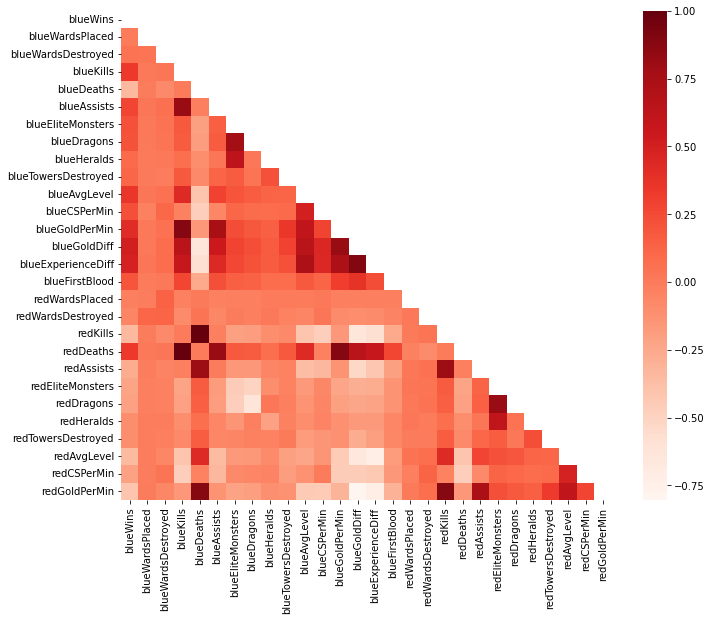

In [8]:
f, ax = plt.subplots(figsize = (11, 9))
mask = np.zeros_like(corr_all, dtype = bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, cmap="Reds", mask=mask)

## Implementing Logistic Regression

In [9]:
X = modelling_df[required_columns[1:]]
Y = modelling_df['blueWins']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [11]:
pipe = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])

In [12]:
scoring = ['precision', 'recall', 'f1', 'accuracy']

In [13]:
## Using a 10 fold cross validation set to train the model
scores = cross_validate(pipe, X_train, y_train, cv=10, scoring=scoring)
scores

{'fit_time': array([0.08642769, 0.03700447, 0.03100228, 0.04000163, 0.03700089,
        0.03400087, 0.03800392, 0.04100084, 0.0410006 , 0.03899908]),
 'score_time': array([0.01100159, 0.00599837, 0.00499845, 0.00699902, 0.00600147,
        0.00499582, 0.00499773, 0.00699806, 0.0070014 , 0.00499678]),
 'test_precision': array([0.6991404 , 0.75496689, 0.71686747, 0.71299094, 0.76035503,
        0.71976401, 0.75316456, 0.7327044 , 0.73511905, 0.73734177]),
 'test_recall': array([0.73939394, 0.69090909, 0.72121212, 0.71732523, 0.78115502,
        0.74164134, 0.72340426, 0.70820669, 0.75075988, 0.70820669]),
 'test_f1': array([0.71870398, 0.72151899, 0.71903323, 0.71515152, 0.77061469,
        0.73053892, 0.7379845 , 0.7202473 , 0.74285714, 0.72248062]),
 'test_accuracy': array([0.71148036, 0.73413897, 0.71903323, 0.71601208, 0.76888218,
        0.72809668, 0.74471299, 0.7265861 , 0.74130106, 0.72919818])}

In [14]:
## F1 score of the Logistic Regression on 10 folds CV
scores['test_f1'].mean()

0.7299130880711852

## Nested Models

In [15]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=5))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

In [16]:
for classifier in clfs:
    pipe.set_params(clf = classifier)
    scores = cross_validate(pipe, X_train, y_train, cv = 10, scoring=scoring)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', round(values.mean(),2))
            print(key,' std ', round(values.std(),2))

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.04
fit_time  std  0.0
score_time  mean  0.01
score_time  std  0.0
test_precision  mean  0.73
test_precision  std  0.02
test_recall  mean  0.73
test_recall  std  0.02
test_f1  mean  0.73
test_f1  std  0.02
test_accuracy  mean  0.73
test_accuracy  std  0.02
---------------------------------
SVC()
-----------------------------------
fit_time  mean  2.25
fit_time  std  0.13
score_time  mean  0.37
score_time  std  0.07
test_precision  mean  0.73
test_precision  std  0.02
test_recall  mean  0.72
test_recall  std  0.02
test_f1  mean  0.72
test_f1  std  0.01
test_accuracy  mean  0.73
test_accuracy  std  0.01
---------------------------------
KNeighborsClassifier()
-----------------------------------
fit_time  mean  0.01
fit_time  std  0.0
score_time  mean  0.13
score_time  std  0.01
test_precision  mean  0.67
test_precision  std  0.03
test_recall  mean  0.67
test_recall  std  0.03
test_

Logistic Regression, Support Vector and XGBoost performed better than others

## Next Steps
- Explore Model on PCA set from the 102_eda
- Hyper parameter tuning
- Extra Feature Engineering
- Deploy advanced models e.g LSTM, Neural Networks